<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Bryan Azahel Juárez Pineda.

**Fecha:** 25 de Abril del 2021.

**Expediente** : if717710 | if722176.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 9: Clase 22

**Link al repositorio:**
> https://github.com/Rub27182n/Tarea9_RHernandez_BAJuarez.git

## Enunciado de tarea (Transcibirlo)
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y compararlo con el valor teórico de la ecuación de Black-Scholes

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

# Solución Bryan

In [1]:
# Importamos las librerías a utilizar.
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from datetime import date
%matplotlib inline

# Algunas opciones para Pandas.
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Definimos las funciones a utilizar.
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

# Función para calcular rendimientos logarítmicos
def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

En este caso particular se analizará el precio de una opción tipo **put** sobre la acción de _Microsoft_ con el ticker **MSFT**.

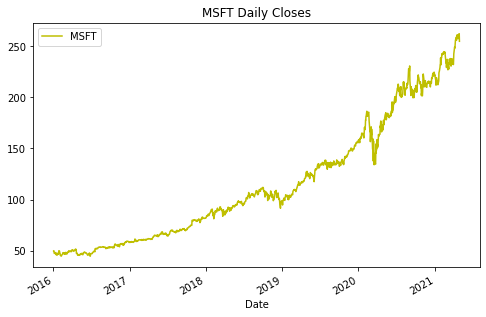

In [3]:
# Comenzamos descargando los precios de MSFT. Desde el 2016 hasta hoy
ticker = ['MSFT']
start_date = '2016-01-01'

# Descargamos precios ajustados.
msft_closes = get_adj_closes(ticker, start_date)

# Graficamos los precios.
msft_closes.plot(c='y', figsize=(8,5));
plt.legend(ticker);
plt.title('MSFT Daily Closes');

De los precios se observa que el comportamiento de la acción de **MSFT** parece seguir un comportamiento exponencial del 2016 a la fecha, sin embargo recordemos que los rendimientos tienen un comportamiento maso menos normal, o al menos es lo que los modelos de valuación asumen, por lo tanto trabajaremos con ellos.

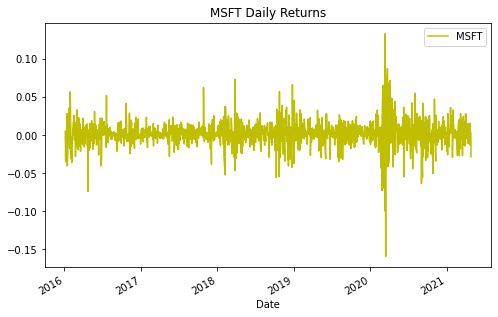

In [4]:
# Calculamos los rendimientos logaritmicos.
ret_msft = log_dailiy_ret(msft_closes)

# Graficamos los rendimientos.
ret_msft.plot(c='y', figsize=(8,5));
plt.legend(ticker);
plt.title('MSFT Daily Returns');

Ahora descargamos los precios de las opciones sobre **MSFT** para posteriormente definir los parámetros y sobre cual trabajar.

In [5]:
# Descargamos las opciones con la API de yahoo finance.
msft = web.YahooOptions('MSFT')
msft_opt = msft.get_all_data().reset_index()
msft_opt.set_index('Expiry').sort_index()
print(f'El precio del activo subyacente es de: {msft_opt.Underlying_Price[0]}')
msft_opt

El precio del activo subyacente es de: 254.56


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
0,65.0,2021-06-18,call,...,2021-04-28 20:00:03,2021-04-28 19:11:23,"{'contractSymbol': 'MSFT210618C00065000', 'str..."
1,65.0,2021-06-18,put,...,2021-04-28 20:00:03,2021-04-27 19:43:30,"{'contractSymbol': 'MSFT210618P00065000', 'str..."
2,70.0,2021-06-18,call,...,2021-04-28 20:00:03,2021-04-22 13:44:01,"{'contractSymbol': 'MSFT210618C00070000', 'str..."
3,70.0,2021-06-18,put,...,2021-04-28 20:00:03,2021-04-23 16:08:57,"{'contractSymbol': 'MSFT210618P00070000', 'str..."
4,70.0,2022-01-21,call,...,2021-04-28 20:00:03,2021-04-16 19:07:40,"{'contractSymbol': 'MSFT220121C00070000', 'str..."
...,...,...,...,...,...,...,...
1847,390.0,2022-06-17,call,...,2021-04-28 20:00:03,2021-04-23 16:00:46,"{'contractSymbol': 'MSFT220617C00390000', 'str..."
1848,390.0,2022-09-16,call,...,2021-04-28 20:00:03,2021-04-28 17:09:47,"{'contractSymbol': 'MSFT220916C00390000', 'str..."
1849,390.0,2023-01-20,call,...,2021-04-28 20:00:03,2021-04-28 15:02:38,"{'contractSymbol': 'MSFT230120C00390000', 'str..."
1850,390.0,2023-03-17,call,...,2021-04-28 20:00:03,2021-04-28 19:53:39,"{'contractSymbol': 'MSFT230317C00390000', 'str..."


Observamos que el precio del subyacente es de $\$254.56$, recordando que en una opción tipo **put** se obtiene utilidad cuando el precio de ejercicio $K$ sobrepasa al precio de mercado y tomando en cuenta la tendencia de crecimiento de la acción se propone una opción con precio de ejercicio $\$270$.

In [6]:
# Definimos los parámetros de la opción
K = 270 # strike price

# Obtenemos la opción con el strike price y la fecha de expiración de '2023-01-20'
indice_opt = msft_opt.loc[(msft_opt.Type=='put') & (msft_opt.Strike==K) & (msft_opt.Expiry=='2023-01-20')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1241,270.0,2023-01-20,put,...,2021-04-28 20:00:03,2021-04-28 19:43:31,"{'contractSymbol': 'MSFT230120P00270000', 'str..."


In [7]:
# Visualizamos las caracterisiticas de la opción.
i_opt= indice_opt.index
opcion_valuar = msft_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MSFT230120P00270000',
 'strike': 270.0,
 'currency': 'USD',
 'lastPrice': 44.0,
 'change': 3.2000008,
 'percentChange': 7.843139,
 'volume': 82,
 'openInterest': 1059,
 'bid': 43.3,
 'ask': 45.15,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619639011,
 'impliedVolatility': 0.26961484786987305,
 'inTheMoney': True}

Se observa que el último precio de la opción registrado es de $\$44$.

### `Valuación por B&S utilizando rendimientos logarítmicos`.

Lo que se hará ahora será simular futuros precios del subyacente (**MSFT**) para evaluar escenarios de precio de la opción tipo **put**. Lo haremos a partir de los rendimientos logarítmicos, de manera que la ecuación del precio se describe por la siguiente ecuación:
$$ S_T = S_0 \cdot e^{\sum_{i=1}^{T} r_i } $$

In [8]:
# Definimos tasa libre de riesgo.
r = (0.05 / 100) / 360

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu = ret_msft.mean()[0]
sigma = ret_msft.std()[0]

# Definimos dt, con frecuencia diaria.
dt = 1

# Definimos el numero de escenarios y el numero de dias
nscen = 10000

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

# Definimos la matriz con los aleatorios normales generados. 
# Utilizaremos el muestreo estratificado igualmente espaciado como método de reducción de varianza.
Z = np.random.randn(ndays, nscen)

# Matriz con la sumatoria de los rendimientos.
sim_ret = pd.DataFrame(sigma*Z+r, index=dates)

# Simulación del precio
S_0 = msft_closes.iloc[-1,0]
S_T = S_0*np.exp(sim_ret.cumsum())
S_T.iloc[0, :] = S_0
S_T

,0,1,2,...,9997,9998,9999
2021-04-28,254.560,254.560,254.560,...,254.560,254.560,254.560
2021-04-29,257.436,246.300,258.573,...,251.038,264.815,250.071
2021-04-30,253.402,251.315,264.241,...,256.137,263.870,251.579
2021-05-03,250.283,254.004,268.247,...,254.793,262.177,249.313
2021-05-04,248.619,252.602,274.773,...,249.978,261.016,243.173
...,...,...,...,...,...,...,...
2023-01-16,203.587,171.200,331.625,...,255.781,294.005,236.332
2023-01-17,204.638,173.527,328.155,...,262.199,292.801,238.050
2023-01-18,209.097,175.852,335.310,...,262.635,296.984,240.968
2023-01-19,209.681,176.146,330.470,...,252.671,286.699,245.159


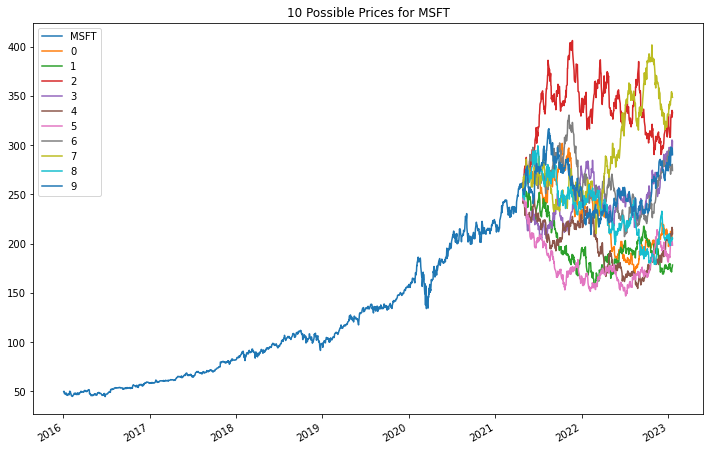

In [9]:
# Graficamos el precio histórico con sus respectivas trayectorias.
pd.concat([msft_closes,S_T.iloc[:,0:10]]).plot(figsize=(12,8));
plt.title('10 Possible Prices for MSFT');

Recordando la función de utilidad de una opción **put**:
$$ P(S(t),t)=max\{K-S(T),0\} $$

El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: 37.806003906020024 USD
El precio de la prima el dia de hoy es de: 44.0 USD


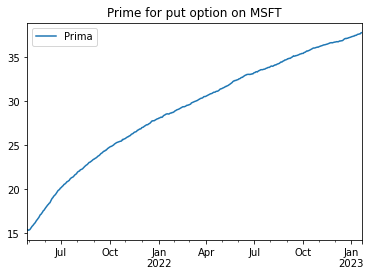

In [32]:
# Valor del put europeo
put_1 = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-S_T, 0).mean(axis=1)}, index=dates)
put_1.plot();
plt.title('Prime for put option on MSFT')

print(f'''El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: {put_1.iloc[-1][0]} USD
El precio de la prima el dia de hoy es de: {opcion_valuar['JSON']['lastPrice']} USD''')

Algo que se observa rápidamente es que el precio de la prima con los precios simulados para el '2023-01-20' es menor al que la prima que se tiene el día de hoy. Es importante recordar que la prima de una opción aumentará su valor en medida de que la probabilidad de que se ejerza aumente, entonces con esto en cuenta y al observar que la prima disminuye su precio en un futuro según la simulación dada, podríamos pensar que en un futuro la probabilidad de que se ejerza la opción será menor por lo tanto el precio de ejercicio $\$270$ no parece reflejar de manera óptima las expectativas sobre **MSFT**.

In [34]:
# Definimos un intervalo de confianza al 99% para el precio de la prima.
confianza = 0.99
sigma_est = S_T.iloc[-1].sem()
mean_est = put_1.iloc[-1].Prima
i_1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(f'Con una confianza del 99% se espera que el precio de la prima este en el intervalo: {i_1}')

Con una confianza del 99% se espera que el precio de la prima este en el intervalo: (35.178102487247806, 40.43390532479224)


### `Valuación por B&S utilizando rendimientos logarítmicos, con reducción de varianza`.

El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: 37.806003906020024 USD


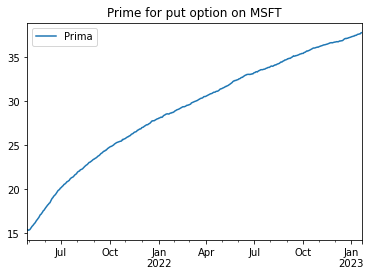

In [110]:
# Usando muestreo estratificado
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z_2 = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z_2+r,index=dates)
S_T2 = S_0*np.exp(sim_ret.cumsum())
S_T2.iloc[0,:] = S_0

# Función de pago
put_2 = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-S_T2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put_2.plot();
plt.title('Prime for put option on MSFT')
print(f'El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: {put_2.iloc[-1][0]} USD')

In [109]:
# Definimos un intervalo de confianza al 99% para el precio de la prima.
sigma_est2 = S_T2.iloc[-1].sem()
mean_est2 = put_2.iloc[-1].Prima
i_2 = st.norm.interval(confianza, loc=mean_est2, scale=sigma_est2)
print(f'Con una confianza del 99% se espera que el precio de la prima este en el intervalo: {i_2}')

Con una confianza del 99% se espera que el precio de la prima este en el intervalo: (35.178102487247806, 40.43390532479224)


### `Valuación utilizando histograma de rendimientos`.

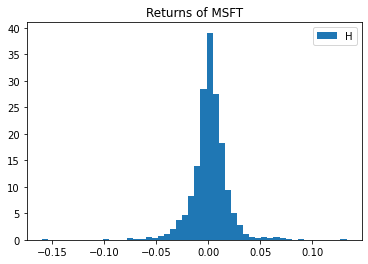

In [115]:
# Comenzamos definiendo el histograma de los rendimientos.
y, x, _ = plt.hist(ret_msft, bins=50, density=True)
plt.legend('Histogram')
plt.title('Returns of MSFT')
plt.show();

In [119]:
# Definimos la probabilidad de ocurrencia de los valores.
prob = y/np.sum(y)
domain_values = x[1:]

# Simulamos los rendimientos como un aleatorio sobre el histograma.
# Rendimientos simulados.
ret_histo = np.random.choice(domain_values, ndays*nscen, p=prob)

# Rendimientos en un Data Frame.
sim_ret_hist = pd.DataFrame(ret_histo.reshape((ndays,nscen)),index=dates)

# Ya con los rendimientos definidos calculamos los precios.
S_T3 = S_0*np.exp(sim_ret_hist.cumsum())
S_T3.iloc[0,:] = S_0
S_T3

,0,1,2,...,9997,9998,9999
2021-04-28,254.560,254.560,254.560,...,254.560,254.560,254.560
2021-04-29,259.769,258.255,255.252,...,256.749,255.252,256.749
2021-04-30,260.883,260.883,262.414,...,256.347,256.347,256.347
2021-05-03,265.085,251.494,268.203,...,257.446,251.494,254.453
2021-05-04,264.670,255.545,272.523,...,260.067,252.573,255.545
...,...,...,...,...,...,...,...
2023-01-16,1866.346,3571.806,1538.811,...,1239.424,2529.597,1329.521
2023-01-17,1852.559,3587.129,1500.881,...,1230.268,2540.449,1350.932
2023-01-18,1882.393,3581.512,1507.320,...,1242.792,2581.361,1356.727
2023-01-19,1912.707,3639.190,1531.594,...,1248.124,2592.435,1362.547


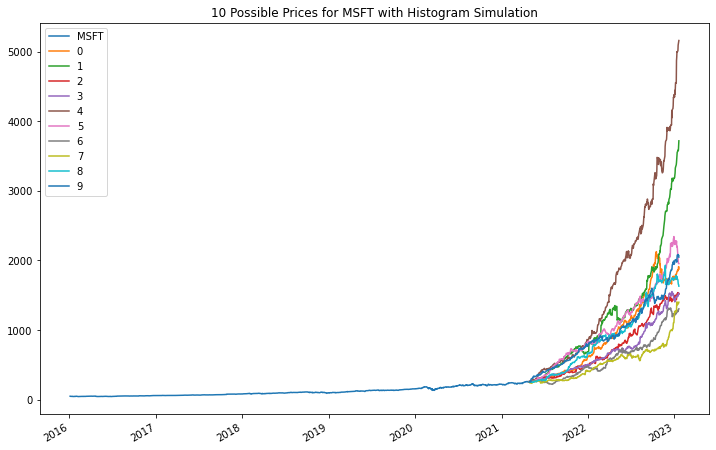

In [120]:
# Graficamos el precio histórico con sus respectivas trayectorias.
pd.concat([msft_closes,S_T3.iloc[:,0:10]]).plot(figsize=(12,8));
plt.title('10 Possible Prices for MSFT with Histogram Simulation');

Contrastando esta gráfica respecto a la valuación con **Black-Scholes** podemos observar que esta última pareciera ponderar con mayor peso la tendencia de crecimiento exponencial que es la más reciente para **MSFT**, sin embargo desescala a niveles que parecieran poco probables para el precio de la acción.

In [124]:
# Normalizamos las escalas.
# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_msft+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos.
ret_histo_rf = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios.
sim_ret_hist_rf = pd.DataFrame(ret_histo_rf.reshape((ndays,nscen)),index=dates)
S_T3_rf = S_0 * np.exp(sim_ret_hist_rf.cumsum())
S_T3_rf.iloc[0, :] = S_0
S_T3_rf

,0,1,2,...,9997,9998,9999
2021-04-28,254.560,254.560,254.560,...,254.560,254.560,254.560
2021-04-29,253.147,268.745,259.441,...,253.628,243.919,262.378
2021-04-30,251.890,267.880,266.786,...,248.561,232.600,267.723
2021-05-03,254.852,270.713,290.689,...,245.885,224.480,267.644
2021-05-04,251.115,272.100,282.807,...,245.345,227.386,270.158
...,...,...,...,...,...,...,...
2023-01-16,401.138,212.565,334.777,...,269.290,328.475,268.346
2023-01-17,398.447,212.471,339.854,...,272.815,331.028,267.444
2023-01-18,393.811,214.843,339.952,...,272.693,331.074,271.262
2023-01-19,393.867,207.253,342.694,...,294.790,332.479,293.242


El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: 34.62308109419731 USD


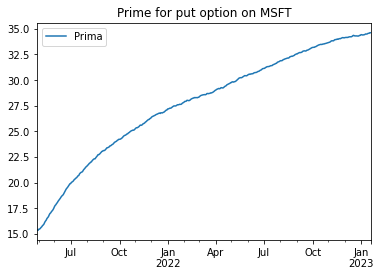

In [125]:
# Función de pago
put_3 = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-S_T3_rf,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put_3.plot();
plt.title('Prime for put option on MSFT')
print(f'El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: {put_3.iloc[-1][0]} USD')

Con este método de valuación, como observamos en la gráfica, parece capturar el crecimiento exponencial de **MSFT** de una sobre manera, de forma que obtenemos en la simulación precios que sobre pasan el actual hasta en un $5000\%$, cuestión que en primera instancia resulta complejo que suceda en la realidad. Es por eso que es necesario normalizar dichas cantidades para que sea comparable en escala.

In [126]:
# Definimos un intervalo de confianza al 99% para el precio de la prima.
sigma_est3 = S_T3.iloc[-1].sem()
mean_est3 = put_3.iloc[-1].Prima
i_3 = st.norm.interval(confianza, loc=mean_est3, scale=sigma_est3)
print(f'Con una confianza del 99% se espera que el precio de la prima este en el intervalo: {i_3}')

Con una confianza del 99% se espera que el precio de la prima este en el intervalo: (16.551612467331935, 52.694549721062685)


### `Valor teórico, calculado con Black-Scholes`.

Recordando el valor teórico de una opción europea tipo **put** se determina por:
$$p = Ke^{-rT}N(-d_{2})-S_{0}N(-d_{1})$$

Donde $d_{1}$ y $d_{2}$ se definen por las siguientes ecuaciones:
$$d_{1} = \frac{ln\big(\frac{S_{0}}{K}\big) + (r+\frac{\sigma^{2}}{2})T}{\sigma \sqrt{T}}$$
$$d_{2} = \frac{ln\big(\frac{S_{0}}{K}\big) + (r-\frac{\sigma^{2}}{2})T}{\sigma \sqrt{T}}$$

In [145]:
# Comenzamos calculando los valores de d1 y d2.
d1 = (np.log(S_0 / K) + (r + sigma**2/2) * ndays) / (sigma * np.sqrt(ndays))
d2 = (np.log(S_0 / K) + (r - sigma**2/2) * ndays) / (sigma * np.sqrt(ndays))

# Definimos el precio de la put, donde N(-d2) y N(-d1) se definen con la distribución de probabilidad acumulada normal.
put_teorico = K * np.exp(-r*ndays) * st.norm.cdf(-d2) - (S_0 * st.norm.cdf(-d1))
print(f'El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: {put_teorico} USD')

El precio de la prima de la opción tipo put europea con fecha de vencimiento 2023-01-20 es de: 46.55954389712774 USD


### `Comparación métodos`.

In [153]:
# Estructuramos la información en un dataframe.
results_puts = pd.DataFrame(columns=['Simulación B&S', 'Simulación B&S RV', 'Simulación Histograma', 'Valor Teórico'],
                            index=['Values in USD'])

# Llenamos los valores del data frame.
results_puts['Simulación B&S'] = put_1.iloc[-1][0]
results_puts['Simulación B&S RV'] = put_2.iloc[-1][0]
results_puts['Simulación Histograma'] = put_3.iloc[-1][0]
results_puts['Valor Teórico'] = put_teorico
results_puts

,Simulación B&S,Simulación B&S RV,Simulación Histograma,Valor Teórico
Values in USD,37.806,37.806,34.623,46.56


Entonces en conclusión podemos ver que prácticamente en todos los métodos donde se implica una simulación de precios el precio del **Put** se ve disminuido a la última cotización que recordemos al día de hoy es de $\$44$, de esto podríamos pensar que la tendencia generalizada de **MSFT** si bien es subir, al nosotros poner el _strike price_ en $\$270$, topamos las expectativas de crecimiento a ese precio y observando el precio de la prima vemos que si bien se acerca al valor (al menos más del _spot price_) no se espera crezca demasiado, esto con las características y supuestos del modelo **Black-Scholes**.

# Solución Rubén

In [ ]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

SyntaxError: invalid syntax (<ipython-input-11-9d1c0c122db9>, line 2)

In [39]:
AAPL = web.YahooOptions('AAPL')
AAPL_opt = AAPL.get_all_data().reset_index()
AAPL_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,75.0,put,AAPL210430P00075000,...,2021-04-29,2021-04-27 13:30:01,"{'contractSymbol': 'AAPL210430P00075000', 'str..."
2021-04-30,132.0,put,AAPL210430P00132000,...,2021-04-29,2021-04-28 19:59:59,"{'contractSymbol': 'AAPL210430P00132000', 'str..."
2021-04-30,80.0,put,AAPL210430P00080000,...,2021-04-29,2021-04-26 16:38:05,"{'contractSymbol': 'AAPL210430P00080000', 'str..."
2021-04-30,80.0,call,AAPL210430C00080000,...,2021-04-29,2021-04-26 18:35:15,"{'contractSymbol': 'AAPL210430C00080000', 'str..."
2021-04-30,133.0,call,AAPL210430C00133000,...,2021-04-29,2021-04-28 19:59:52,"{'contractSymbol': 'AAPL210430C00133000', 'str..."
...,...,...,...,...,...,...,...
2023-06-16,120.0,call,AAPL230616C00120000,...,2021-04-29,2021-04-28 19:54:53,"{'contractSymbol': 'AAPL230616C00120000', 'str..."
2023-06-16,120.0,put,AAPL230616P00120000,...,2021-04-29,2021-04-28 19:55:48,"{'contractSymbol': 'AAPL230616P00120000', 'str..."
2023-06-16,125.0,call,AAPL230616C00125000,...,2021-04-29,2021-04-28 19:50:04,"{'contractSymbol': 'AAPL230616C00125000', 'str..."


In [40]:
# Precio activo subyacente
AAPL_opt.Underlying_Price[0]

136.7

In [42]:
K = 135 # Strike price
indice_opt = AAPL_opt.loc[(AAPL_opt.Type=='put') & (AAPL_opt.Strike==K) & (AAPL_opt.Expiry=='2023-06-16')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1231,135.0,2023-06-16,put,...,2021-04-29,2021-04-28 19:55:48,"{'contractSymbol': 'AAPL230616P00135000', 'str..."


In [43]:
i_opt= indice_opt.index
opcion_valuar = AAPL_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.65,
 'change': 0.39999962,
 'percentChange': 1.649483,
 'volume': 73,
 'openInterest': 248,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619639748,
 'impliedVolatility': 0.339499402923584,
 'inTheMoney': True}

In [44]:
print('Precio del activo subyacente actual = ', opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  136.7


## Simulación de precios usando rendimiento logarítmico

In [49]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_AAPL = get_adj_closes(ticker, start_date)

# Obtenemos el rendimiento simple
Ri = closes_AAPL.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-04-22,-0.012
2021-04-23,0.018
2021-04-26,0.003


In [50]:
AAPL_RET = calc_daily_ret(closes_AAPL)

In [51]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())

# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates = pd.date_range(today, expiry, freq='B')
ndays = len(dates)

In [52]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_AAPL)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
dt = 1
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_AAPL.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Valuar Con Black & Scholes

In [53]:
# media y desviación estandar muestral de los rendimietnos logaritmicos
mu = AAPL_RET.mean()[0]
sigma = AAPL_RET.std()[0]
mu, sigma

(0.0014566965181412423, 0.019922754361072752)

In [54]:
# Tasa de bonos de 1 yr de fecha 26/04/2021 -> 0.06%
r = 0.0006/360 # Tasa diaria

In [55]:
today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

dates = pd.date_range(start=today, end=expiry, freq='B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-03',
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', length=558, freq='B')

In [56]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-04-28,0.008,0.011,0.003,...,-0.007,0.014,-0.004
2021-04-29,0.010,0.030,-0.028,...,-0.017,0.017,0.007
2021-04-30,0.016,0.078,-0.007,...,-0.020,0.015,0.029
2021-05-03,0.036,0.050,-0.028,...,-0.022,-0.027,0.061
2021-05-04,0.029,0.052,-0.037,...,-0.012,-0.020,0.054
...,...,...,...,...,...,...,...
2023-06-12,-0.063,0.870,-0.278,...,0.277,0.033,1.019
2023-06-13,-0.097,0.897,-0.289,...,0.274,0.031,1.045
2023-06-14,-0.097,0.894,-0.298,...,0.273,0.004,1.055
2023-06-15,-0.091,0.879,-0.315,...,0.260,0.009,1.047


In [57]:
# Calcular los escenartrios de precios 
S0 = closes_AAPL.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0, :] = S0
sim_closes

,0,1,2,...,7,8,9
2021-04-28,133.580,133.580,133.580,...,133.580,133.580,133.580
2021-04-29,134.874,137.627,129.849,...,131.350,135.929,134.512
2021-04-30,135.704,144.388,132.593,...,130.981,135.628,137.566
2021-05-03,138.453,140.470,129.904,...,130.672,130.038,142.019
2021-05-04,137.516,140.774,128.680,...,131.982,130.949,141.031
...,...,...,...,...,...,...,...
2023-06-12,125.392,318.855,101.167,...,176.144,138.009,370.178
2023-06-13,121.218,327.502,100.050,...,175.626,137.813,379.700
2023-06-14,121.290,326.476,99.119,...,175.488,134.147,383.830
2023-06-15,121.972,321.769,97.519,...,173.167,134.736,380.761


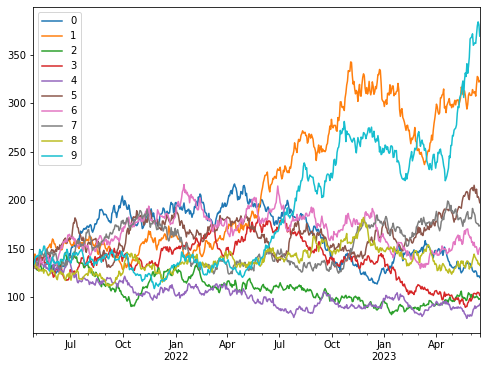

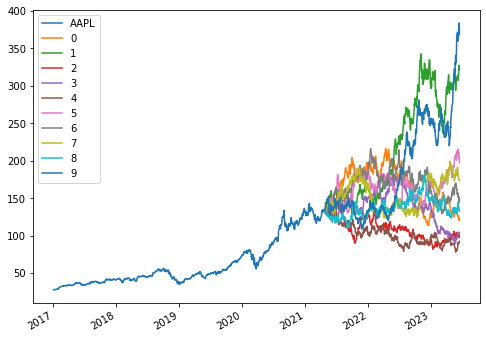

In [58]:
# graficas
sim_closes.plot(figsize=(8,6));
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_AAPL,sim_closes]).plot(figsize=(8,6));

In [59]:
opcion_valuar

Strike                                                            135
Expiry                                            2023-06-16 00:00:00
Type                                                              put
Symbol                                            AAPL230616P00135000
Last                                                             24.6
                                          ...                        
Underlying                                                       AAPL
Underlying_Price                                                  137
Quote_Time                                        2021-04-29 00:00:00
Last_Trade_Date                                   2021-04-28 19:55:48
JSON                {'contractSymbol': 'AAPL230616P00135000', 'str...
Name: 1231, Length: 19, dtype: object

In [60]:
Hoy = date.today()

# strike price de la opción
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_AAPL.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

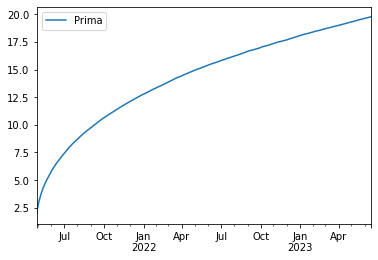

In [61]:
# Valor del put europeo
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(K-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

**La valuación de la opción es:**

In [62]:
put.iloc[-1]

Prima    19.798
Name: 2023-06-16 00:00:00, dtype: float64

**Intervalo de confianza al 99%:**

In [63]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.193573579325896, 20.402301902207295)


## Precios simulados usando técnicas de reducción de varianza

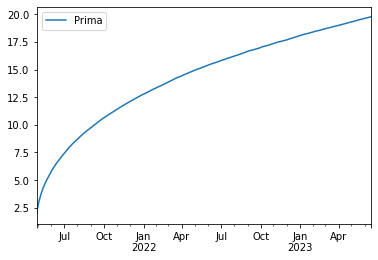

In [64]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

**La valuación de la opción es:**

In [65]:
put.iloc[-1]

Prima    19.798
Name: 2023-06-16 00:00:00, dtype: float64

**Intervalo de confianza al 99%:**

In [66]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.193573579325896, 20.402301902207295)


### Análisis de la distribución de los rendimientos

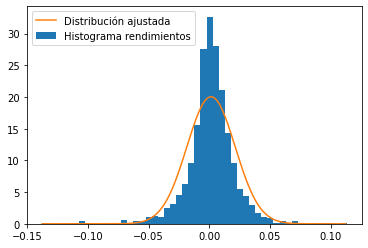

In [68]:
# ajustando norm 
ren = calc_daily_ret(closes_AAPL) # rendimientos 
y,x,_ = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

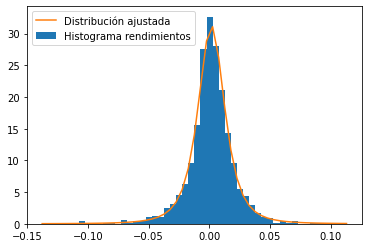

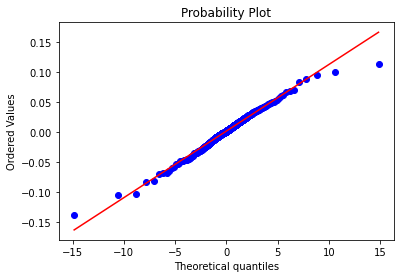

In [70]:
# ajustando t 
# rendimientos 
ren = calc_daily_ret(closes_AAPL) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['AAPL'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['AAPL'], sparams=params[:-2], dist=dist, plot=plt);

## Valuación usando simulación: uso de histograma de rendimientos

In [71]:
ndays = len(dates) 
nscen = 10

prob = y/np.sum(y)
values = x[1:]
prob.sum()

1.0

In [72]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,0.008,0.038,-0.002,...,0.008,0.073,-0.002
2021-04-29,0.033,0.003,0.023,...,0.018,0.028,0.008
2021-04-30,0.028,-0.002,-0.007,...,0.023,0.003,0.008
2021-05-01,0.003,0.008,0.003,...,-0.002,0.023,0.003
2021-05-02,0.003,0.003,0.013,...,0.018,-0.012,-0.017
...,...,...,...,...,...,...,...
2022-11-02,0.013,-0.002,-0.017,...,0.013,0.003,-0.007
2022-11-03,0.038,0.003,0.008,...,-0.002,-0.002,-0.042
2022-11-04,0.028,0.023,0.013,...,-0.047,0.003,0.003
2022-11-05,0.038,0.013,0.018,...,0.008,0.008,-0.002


In [74]:
sim_closes_hist = (closes_AAPL.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,134.625,138.740,133.281,...,134.625,143.699,133.281
2021-04-29,139.125,139.125,136.361,...,137.047,147.759,134.324
2021-04-30,143.056,138.814,135.375,...,140.214,148.170,135.375
2021-05-01,143.454,139.900,135.751,...,139.900,151.594,135.751
2021-05-02,143.853,140.289,137.502,...,142.417,149.744,133.424
...,...,...,...,...,...,...,...
2022-11-02,2202.391,2247.038,861.833,...,866.168,1255.589,2158.631
2022-11-03,2287.458,2253.286,868.576,...,864.229,1252.778,2069.061
2022-11-04,2352.090,2305.356,879.775,...,824.223,1256.262,2074.814
2022-11-05,2442.940,2335.081,895.601,...,830.672,1266.091,2070.170


Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

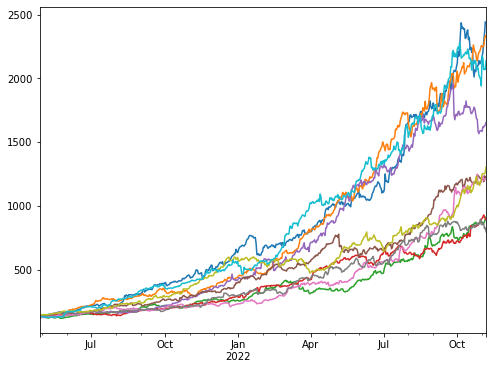

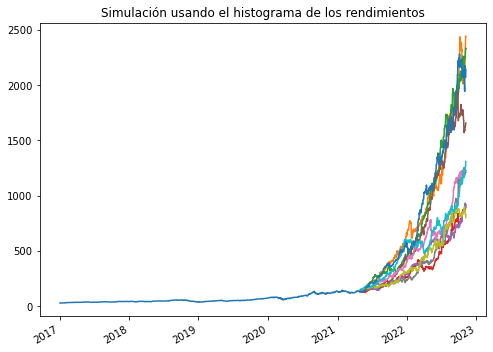

In [75]:
sim_closes_hist.plot(figsize=(8,6),legend=False);
pd.concat([closes_AAPL,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [76]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 100000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(AAPL_RET+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_AAPL.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

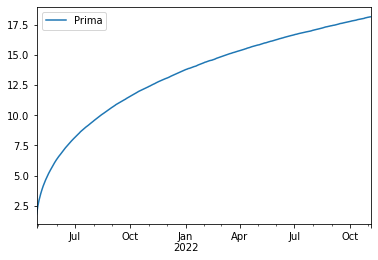

In [77]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

**La valuación de la opción es:**

In [78]:
put_hist.iloc[-1]

Prima    18.166
Name: 2022-11-06 00:00:00, dtype: float64

In [79]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL230616P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 24.65,
 'change': 0.39999962,
 'percentChange': 1.649483,
 'volume': 73,
 'openInterest': 248,
 'bid': 22.0,
 'ask': 27.0,
 'contractSize': 'REGULAR',
 'expiration': 1686873600,
 'lastTradeDate': 1619639748,
 'impliedVolatility': 0.339499402923584,
 'inTheMoney': True}

**Intervalo de confianza de 95%:**

In [80]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)

(17.691520622869323, 18.64140577669924)


# Obtener valor teórico

$$
d_1 = \frac{\ln{\frac{S_0}{K}} + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}, \quad d_2 = \frac{\ln{\frac{S_0}{K}} + (r - \sigma^2 / 2) T}{\sigma \sqrt{T}} 
$$
**PUT:**
$$
p = K e^{-r*T} N(-d_2) - S_0 N(-d_1)
$$

**Sustituyendo:**

$$
d_1 = \frac{\ln{\frac{136.7}{135}} + (\frac{0.0006}{360} + 0.02^2 / 2)* 560}{0.02 *\sqrt{560}} = 0.265
\quad d_2 = \frac{\ln{\frac{136.7}{135}} + (\frac{0.0006}{360} - 0.02^2 / 2)* 560}{0.02 *\sqrt{560}} = -0.2121
$$

$$ 
p = 135 e^{\frac{0.0006}{360}*560} * 0.60257 - (136.7*0.39743) = 27.3724
$$

In [84]:
df = pd.DataFrame(index=['Valor'], columns = ['B&S', 'MRV', 'Histograma de R', 'Valor Teórico'])
df['B&S'] = 19.798
df['MRV'] = 19.798
df['Histograma de R'] = 18.166
df['Valor Teórico'] = 27.3724
df

,B&S,MRV,Histograma de R,Valor Teórico
Valor,19.798,19.798,18.166,27.372
